## In the next series of challenges, we will predict employee salaries from different employee characteristics (or features). We ask employees working in four different fields to state their salary and some background information. 

In [23]:
import pandas as pd
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt     
%matplotlib inline
from scipy.stats import iqr
from scipy.stats.stats import pearsonr

In [24]:
salary_df = pd.read_csv('salary.csv')

#### How many responders are there? Are there any missing values in any of the variables?
514 responders with 1 missing entry in the salary column

In [25]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB


In [26]:
salary_df.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

#### What is the lowest salary and highest salary in the group?
Lowest salary: 29000
Highest salary: 96156

In [27]:
display(salary_df['salary'].min())
display(salary_df['salary'].max())

29000.0

96156.0

#### What is the mean salary for the sample? Include the standard error of the mean.
Mean: 50863.22
Standard error mean: 560.0622

In [28]:
salary_df['salary'].mean()

50863.22009783626

In [29]:
salary_df['salary'].sem()

560.0622753925232

#### What is the standard deviation for the years worked?
9.4378

In [30]:
np.std(salary_df['yearsworked'])

9.435503224576884

#### What is the median salary for the sample?
50096

In [31]:
salary_df['salary'].median()

50096.0

#### What is the interquartile range for salary in the sample?
20345

In [32]:
#drop nan row for calculation to work
salary_df = salary_df.dropna(how='any',axis=0)
iqr(salary_df['salary'])

20345.0

#### How many men are there in the sample? How many women are there in the sample? Present this information in a table. 
| Men | Women |
|------|------|
|   386  | 128|

In [33]:
salary_df['male'].value_counts()

1    385
0    128
Name: male, dtype: int64

#### How many women are executives compared to men? 
19 female executives
191 Male executives

In [34]:
salary_df['male'] =  salary_df['male'].map({0: 'female', 1: 'male'})
salary_df.groupby(['position', 'male']).size()

position  male  
1         female     60
          male       83
2         female     49
          male      111
3         female     19
          male      191
dtype: int64

#### Create a histogram for the variable Salary
##### Examine the histogram and describe the distribution for Salary.
Salary is skewed right

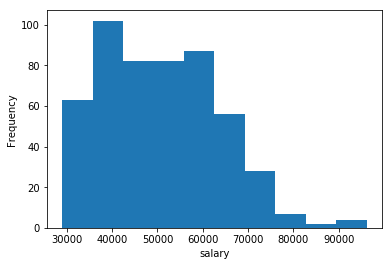

In [35]:
salary_df['salary'].plot(kind='hist')
plt.xlabel('salary')
plt.show()

#### Create a bar graph to show the different average salaries of men and women. (Bonus: Add error bars to the bars showing the 95% confidence interval). What does the graph tell you about the difference between men and women’s salaries? 
Males have higher average salaries than women

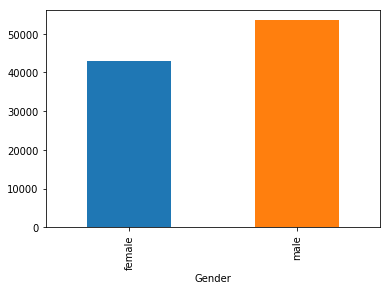

In [36]:
avg_salary = salary_df.groupby('male').mean()
avg_salary['salary'].plot(kind='bar')
plt.xlabel('Gender')
plt.show()

#### Create a scatterplot showing the relationship between Years Worked and Salary (don’t forget to insert a trend line). What is the relationship between Years Worked and Salary?

##### 1. Describe any patterns in the scatterplot. Do you notice any unusual/extreme values that do not fit the general trend? If you see any unusual values, briefly describe them (Who are they? In what way are they different?)
There is a positive-linear relationship in the data. With a moderate relationship between years worked and salary. We’ve got outliers that either have high salaries with fewer years worked or many years worked with lower salaries


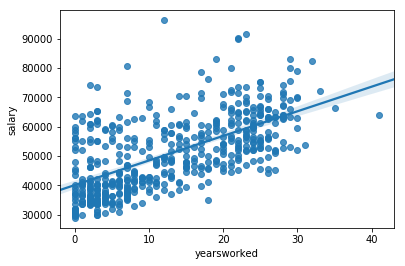

In [37]:
sns.regplot(salary_df['yearsworked'], salary_df['salary'])

#### Using the pearsonr function from the scipy.stats package, calculate the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between Years Worked and Salary. See help(pearsonr) for help on this function.

##### 1. Interpret the size and direction of the correlation statistic. 
A moderate uphill (positive) relationship
##### 2. Is the relationship statistically significant? Report the appropriate statistic(s) to support your answer. 
It is not because the p-value is 1.2873351342921916e-56

In [38]:
pearsonr(salary_df['yearsworked'], salary_df['salary'])

(0.6235888657598045, 1.2873351342921916e-56)